<a href="https://colab.research.google.com/github/yustiks/statistics_in_python/blob/master/dz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание по статистическому анализу на python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

Построить нормальное гауссово распределение для двух переменных: x, y. Нарисовать их на плоскости (scatter plot).

In [2]:
mu1 = 30
sigma1 = 5

mu2 = 20
sigma2 = 5

amount = 1000

norm_rv1 = sts.norm(loc=mu1, scale=sigma1)
norm_rv2 = sts.norm(loc=mu2, scale=sigma2)

x = norm_rv1.rvs(size=amount)
y = norm_rv2.rvs(size=amount)

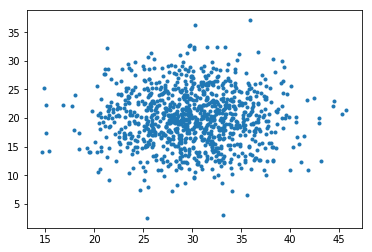

In [3]:
plt.scatter(x, y, marker='.')

Нарисовать плотность распределения полученной выборки x.

In [4]:
# задали переменную и поместили в нее значение плотности x
x_v = np.linspace(0, 60, num = 1000)
pdf_x = norm_rv1.pdf(x_v)


Text(0.5, 0, '$x$')

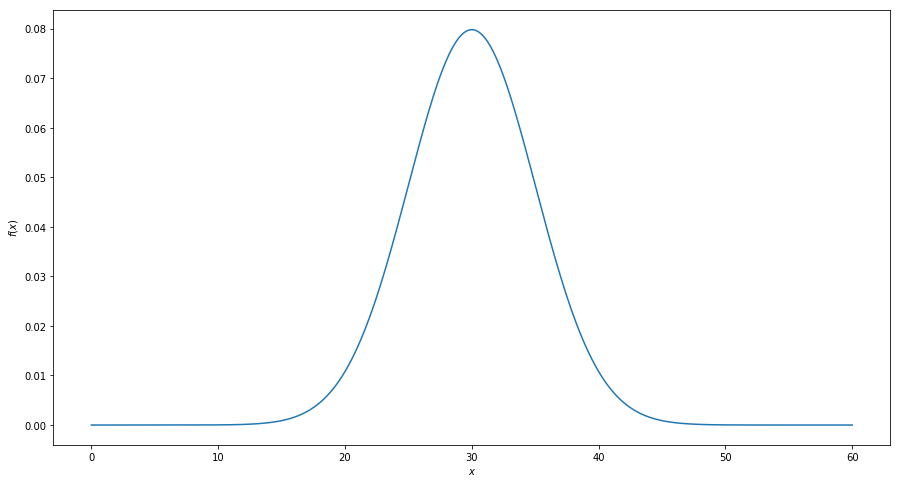

In [5]:
plt.figure(figsize=(15,8))
plt.plot(x_v, pdf_x)

plt.ylabel('$f(x)$')
plt.xlabel('$x$')

In [6]:
# аналогично для y
pdf_y = norm_rv2.pdf(x_v)

Text(0.5, 0, '$x$')

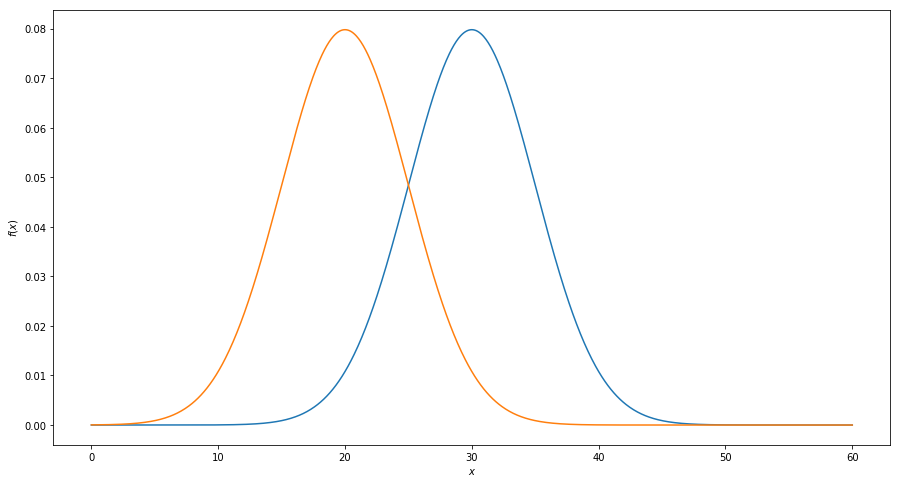

In [7]:
plt.figure(figsize=(15,8))
plt.plot(x_v, pdf_x)

plt.plot(x_v, pdf_y)

plt.ylabel('$f(x)$')
plt.xlabel('$x$')

Изменить гауссово распределение с помощью матрицы масштабирования Scale = [[n, 0], [0, n]], где n - число, во сколько раз увеличиваем разброс данной выборки. Построить график зависимости (корелляции) x от y.

(-33.64793857387653, 34.73844099962786, -38.2357007833872, 37.79253407124764)

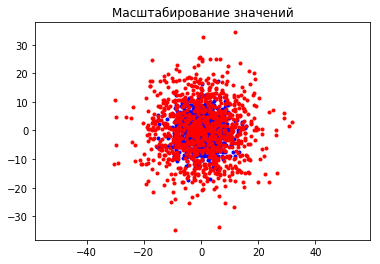

In [8]:
# создали матрицу значений x и y
XY = np.vstack((x, y)).T

# центрировали, чтобы среднее значение = 0, иначе при масштабирование исходный матрицы получим сдвиг всех значений влево или вправо
XYC = XY - np.mean(XY,0)

# создали матрицу ковариации, увеличиваем масштаб в 2 раза по x и y
n = 2
Scale = np.array([[n, 0], [0, n]])

# yмножаем матрицу на исходную центрированную матрицу
XYC1 = XYC.dot(Scale)


plt.plot(XYC[:, 0], XYC[:, 1], 'b.')
plt.plot(XYC1[:, 0], XYC1[:, 1], 'r.')
plt.title('Масштабирование значений')
plt.axis('equal')


Нарисовать плотность распределения полученной выборки x. Сравнить с предыдущим графиком x. 

In [9]:
def sigma(p):
    '''
    для расчета среднеквадратического отклонения данных
    '''
    mu = p.mean()
    d = 0
    for j in p:
        s = ((j-mu)**2)
        d += s
    return (d / len(p))**(0.5)

In [10]:
def pdf(p):
    '''
    для расчета функциии плотности нормального распределения
    '''
    mu = p.mean()
    part_1 = 1/(sigma(p)*np.sqrt(2*np.pi))
    list_pv = []
    for i in p:
        pv = part_1 *np.exp( - ((i - mu)**2) / (2 * (sigma(p))**2))
        list_pv.append(pv)
    return list_pv

In [11]:
# применили функцию для x и x из масштабированной матрицы XYC1
pdf0 = pdf(x)
pdf1 = pdf(XYC1[:, 0])

Маштабированная матрица имеет более низкую плотность, так как мы увеличили разброс распределения.
Было 0,8
Стало 0,4

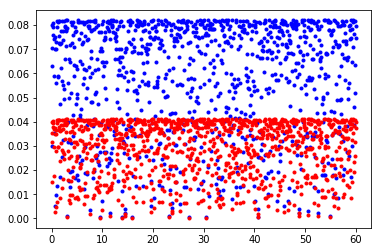

In [12]:
plt.plot(x_v, pdf0, 'b.')
plt.plot(x_v, pdf1, 'r.')

Построим график плотности как в начале

In [13]:
# считаем значение среднего х и среднеквадратического отклонения в масштабированной матрице
mu11 = XYC1[:, 0].mean()
sigma11 = sigma(XYC1[:, 0])

# строим по данным параметрам норм. распределение
norm_rv11 = sts.norm(loc=mu11, scale=sigma11)

# считаем функцию плотности с помощью метода .pdf() по оси x_v
pdf_x11 = norm_rv11.pdf(x_v)


Ожидаемо получаем те же самые значения и отношения.

Text(0.5, 0, '$x$')

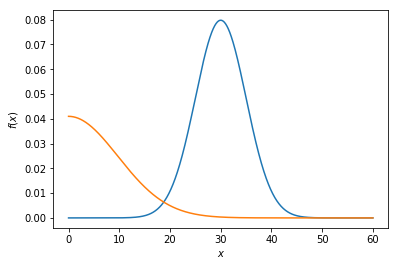

In [14]:
plt.plot(x_v, pdf_x)
plt.plot(x_v, pdf_x11)

plt.ylabel('$f(x)$')
plt.xlabel('$x$')

Посчитать коэффициент Пирсона для переменных x, y. Что означает положительное значение коэффициента? Отрицательное? 0? 

In [15]:
from scipy.stats import pearsonr

В нашем случае коэффициент Пирсона показывает отсутствие связи между x и у в нашем случае. 

положительное значение - прямая линейная зависимость, при увеличении x пропорционально увеличивается y.

Отрицательное - обратная линейная зависимость, при увеличении х пропорционально уменьшается y.

0 - статистической связи между x и y нет

In [16]:
# cчитаем коэф. корреляции Пирсона
corr, p_value = pearsonr(x, y)
print(corr)

0.004448695962432525


Сгенерировать равномерное распределение на отрезке [1, 10]. Нарисовать график плотности распределения. Чем оно отличается от нормального?

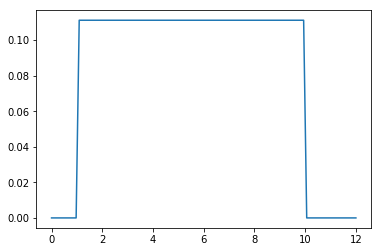

In [17]:
a = 1
b = 10

uniform_rv = sts.uniform(a, b-a)

uniform_rv.rvs(100)

z = np.linspace(0, 12, 100)
pdf_u = uniform_rv.pdf(z)
plt.plot(z, pdf_u)

Постоянной плотностью распределения вероятности. Таким образом, вероятность получения каждого элемента одинакова = 1/(10-1) = 0.11111 в нашем случае.


Найти на графике примеры выброса. Что они означают?  

Выбросы:
(0, 95)
(40, 80)
(80, 0)
(85, 10)

Об ошибках в данных, о разнородности данных.


Найти корелляцию в следующих данных: 

In [18]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Корелляция между: 4046 - Total number of avocados with PLU 4046 sold  и например Average Price. Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

In [19]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler.fit_transform(df[['AveragePrice', '4770']])
df_norm = pd.DataFrame(np_scaled)
print(df_norm[:5])

          0         1
0  0.316726  0.000019
1  0.323843  0.000023
2  0.174377  0.000051
3  0.227758  0.000029
4  0.298932  0.000030


In [20]:
avg_price = df_norm[0]
vol_4770 = df_norm[1]

In [21]:
df_norm.corr()

,0,1
0,1.000000,-0.179446
1,-0.179446,1.000000


In [22]:
import seaborn as sns

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


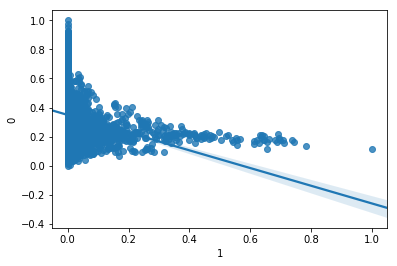

In [23]:
sns.regplot(x= vol_4770, y=avg_price,data=df_norm, fit_reg=True) 

В целом по total volume средняя цена не сильно зависит от кол-ва проданных авокадо 4770. Из графика видно, что больше определенного количества авокадо 4770 практически не покупают. Этим и объяснется его ограниченное влияние на цену.

In [24]:
volume_4770 = df['4770']
volume_4770.head(3)

0     48.16
1     58.33
2    130.50
Name: 4770, dtype: float64

In [25]:
# это наш выброс, кроме этого есть еще подозрительное скопление между 0.6 и 0.8
volume_4770.max()

2546439.11

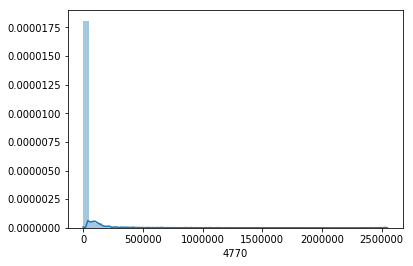

In [26]:
sns.distplot(volume_4770)

Действительно, объем каждой покупки авокадо 4770, в большинстве случае приходится на ограниченный минимальный объем.